# 🏀 March Machine Learning Mania 2025 - EDA

This notebook explores the data provided for the [Kaggle March Machine Learning Mania 2025](https://www.kaggle.com/competitions/march-machine-learning-mania-2025/overview) competition.

📌 **Objective**:  
Predict the outcomes of this year’s NCAA basketball tournament games using rich historical data and machine learning. Submissions are evaluated using the **Brier score**, which measures the accuracy of predicted probabilities.

📦 **Data**:  
The dataset includes 36 files covering regular season results, tournament outcomes, team rankings, seeds, coaches, and more. All data is cleaned and provided directly by Kaggle.

You can find the full dataset [here](https://www.kaggle.com/competitions/march-machine-learning-mania-2025/data).


## SET UP

In [1]:
# Essential Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm #crating progress bar in loops
import os
from ipywidgets import widgets, interact, IntRangeSlider, Dropdown
from matplotlib.ticker import MaxNLocator
from IPython.display import display
import warnings


In [2]:
# Settings
sns.set_style("whitegrid")
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
warnings.filterwarnings("ignore")

## DATASET

In [3]:
base_path = r"C:\Users\ADMIN\Desktop\Kaggle\March_Machine_Learning_Mania_2025"

'''
# List files in the subdirectory
if os.path.exists(base_path):
    print(f"Listing files in {base_path}:")
    for dirpath, subdir, filenames in os.walk(base_path):
        for file in filenames:
            print(f"File: {file}")
else:
    print(f"Directory not found: {base_path}")'
'''

'\n# List files in the subdirectory\nif os.path.exists(base_path):\n    print(f"Listing files in {base_path}:")\n    for dirpath, subdir, filenames in os.walk(base_path):\n        for file in filenames:\n            print(f"File: {file}")\nelse:\n    print(f"Directory not found: {base_path}")\'\n'

In [17]:
# Load the data
## Section 1 - Basics
###### Mens 
men_teams = pd.read_csv(f"{base_path}\input\Section_1_Basics\MTeams.csv")
mncaa_seed = pd.read_csv(f"{base_path}\input\Section_1_Basics\MNCAATourneySeeds.csv")
mreg_compact = pd.read_csv(f"{base_path}\input\Section_1_Basics\MRegularSeasonCompactResults.csv")
mncaa_compact = pd.read_csv(f"{base_path}\input\Section_1_Basics\MNCAATourneyCompactResults.csv")
men_seasons = pd.read_csv(f"{base_path}\input\Section_1_Basics\MSeasons.csv")
##### Womens 
women_teams = pd.read_csv(f"{base_path}\input\Section_1_Basics\WTeams.csv")
women_seasons = pd.read_csv(f"{base_path}\input\Section_1_Basics\WSeasons.csv")
wncaa_seed = pd.read_csv(f"{base_path}\input\Section_1_Basics\WNCAATourneySeeds.csv")
wreg_compact = pd.read_csv(f"{base_path}\input\Section_1_Basics\WRegularSeasonCompactResults.csv")
wncaa_compact = pd.read_csv(f"{base_path}\input\Section_1_Basics\WNCAATourneyCompactResults.csv")

## Section 2 - Boxscore
mncaa_detailed = pd.read_csv(f"{base_path}\input\Section_2_Boxscore\MNCAATourneyDetailedResults.csv")
mreg_detailed = pd.read_csv(f"{base_path}\input\Section_2_Boxscore\MRegularSeasonDetailedResults.csv")
wreg_detailed = pd.read_csv(f"{base_path}\input\Section_2_Boxscore\WRegularSeasonDetailedResults.csv")
wncaa_detailed = pd.read_csv(f"{base_path}\input\Section_2_Boxscore\WNCAATourneyDetailedResults.csv")

## Section 3 - Geography
# mens_games_cities = pd.read_csv(f"{base_path}\input\Section_3_Geography\MGameCities.csv")
# womens_games_cities = pd.read_csv(f"{base_path}\input\Section_3_Geography\WGameCities.csv")
# cities = pd.read_csv(f"{base_path}\input\Section_3_Geography\Cities.csv")

## Section 4 - Rankings
rankings = pd.read_csv(f"{base_path}\input\Section_4_Ranking\MMasseyOrdinals.csv")

### Section 5 - Supplements 
conferences  = pd.read_csv(f"{base_path}\input\Section_5_Supplements\Conferences.csv")
men_coaches = pd.read_csv(f"{base_path}\input\Section_5_Supplements\MTeamCoaches.csv")
men_team_conferences = pd.read_csv(f"{base_path}\input\Section_5_Supplements\MTeamConferences.csv")
#mncaa_slots = pd.read_csv(f"{base_path}\input\Section_5_Supplements\MNCAATourneySlots.csv")
#mncaa_seed_round_slots = pd.read_csv(f"{base_path}\input\Section_5_Supplements\MNCAATourneySeedRoundSlots.csv")
#md2_compact = pd.read_csv(f"{base_path}\input\Section_5_Supplements\MSecondaryTourneyCompactResults.csv")
#md2_team = pd.read_csv(f"{base_path}\input\Section_5_Supplements\MSecondaryTourneyTeams.csv")
#mteam_spell = pd.read_csv(f"{base_path}\input\Section_5_Supplements\MTeamSpellings.csv")
wmen_team_conferences = pd.read_csv(f"{base_path}\input\Section_5_Supplements\WTeamConferences.csv")
#wncaa_slots = pd.raed_csv(f"{base_path}\input\Section_5_Supplements\WNCAATourneySlots.csv")
#wncaa_game = pd.read_csv(f"{base_path}\input\Section_5_Supplements\WConferenceTourneyGames.csv")
#wd2_compact = pd.read_csv(f"{base_path}\input\Section_5_Supplements\WSecondaryTourneyCompactResults.csv")
#wd2_team = pd.read_csv(f"{base_path}\input\Section_5_Supplements\WSecondaryTourneyTeams.csv")

### Submission files 

sample_submission_1 =   pd.read_csv(f"{base_path}\input\SampleSubmissionStage1.csv")
sample_submission_2 = pd.read_csv(f"{base_path}\input\SampleSubmissionStage2.csv")


In [5]:
submission_3 = pd.read_csv(r"C:\Users\Admin\Desktop\Kaggle\March_Machine_Learning_Mania_2025\input\NCAA_from_1985.csv")

## OVERVIEW

In [6]:
for gender in ['Mens', 'Womens']:
    print(f"Investigating {gender} Team")
    if gender == 'Mens':
        df = men_teams
    else:
        df = women_teams
    display(df.describe())
    display(df.head())

Investigating Mens Team


,TeamID,FirstD1Season,LastD1Season
count,380.000000,380.000000,380.000000
mean,1290.500000,1989.618421,2023.952632
std,109.840794,9.755814,5.686894
min,1101.000000,1985.000000,1985.000000
25%,1195.750000,1985.000000,2025.000000
50%,1290.500000,1985.000000,2025.000000
75%,1385.250000,1986.250000,2025.000000
max,1480.000000,2025.000000,2025.000000


,TeamID,TeamName,FirstD1Season,LastD1Season
0,1101,Abilene Chr,2014,2025
1,1102,Air Force,1985,2025
2,1103,Akron,1985,2025
3,1104,Alabama,1985,2025
4,1105,Alabama A&M,2000,2025


Investigating Womens Team


,TeamID
count,378.000000
mean,3290.465608
std,109.637116
min,3101.000000
25%,3196.250000
50%,3290.500000
75%,3384.750000
max,3480.000000


,TeamID,TeamName
0,3101,Abilene Chr
1,3102,Air Force
2,3103,Akron
3,3104,Alabama
4,3105,Alabama A&M


Womens teams don't have a FirstD1Season and LastD1Season listed. Also that there are 2 less teams for the womens.

In [7]:
# Find unique values in Team Names
series1 = men_teams['TeamName']
series2 = women_teams['TeamName']
unique_in_series1 = series1[~series1.isin(series2)]

# Values in series2 but not in series1
unique_in_series2 = series2[~series2.isin(series1)]

# Combine results
unique_values = pd.concat([unique_in_series1, unique_in_series2])

print("Two NCAA Schools that don't have female teams:", ', '.join(unique_values.tolist()))


Two NCAA Schools that don't have female teams: Citadel, VMI


In [8]:
for gender in ['Mens', 'Womens']:
    print(f"Investigating {gender} Team")
    if gender == "Mens":
        df = mncaa_seed
    else:
        df = wncaa_seed
    display(df.describe())
    display(df.head())

Investigating Mens Team


,Season,TeamID
count,2558.000000,2558.000000
mean,2004.376466,1290.900704
std,11.449682,103.447343
min,1985.000000,1101.000000
25%,1994.250000,1208.000000
50%,2004.000000,1285.000000
75%,2014.000000,1387.000000
max,2024.000000,1463.000000


,Season,Seed,TeamID
0,1985,W01,1207
1,1985,W02,1210
2,1985,W03,1228
3,1985,W04,1260
4,1985,W05,1374


Investigating Womens Team


,Season,TeamID
count,1676.000000,1676.000000
mean,2010.742243,3286.954057
std,7.775685,100.040265
min,1998.000000,3101.000000
25%,2004.000000,3206.500000
50%,2011.000000,3281.000000
75%,2017.000000,3376.250000
max,2024.000000,3465.000000


,Season,Seed,TeamID
0,1998,W01,3330
1,1998,W02,3163
2,1998,W03,3112
3,1998,W04,3301
4,1998,W05,3272


In [8]:
# Investigate the compact results
for gender in {'Mens', 'Womens'}:
    print(f"Investigating {gender} Team")
    if gender == 'Mens':
        df = mncaa_compact
    else:
        df = wncaa_compact
    display(df.describe())
    display(df.head())

Investigating Mens Team


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,NumOT
count,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000
mean,2004.374106,139.150913,1284.984114,76.867355,1291.419778,65.077442,0.066720
std,11.447616,4.218254,101.039491,11.768184,103.424835,11.043525,0.278191
min,1985.000000,134.000000,1101.000000,43.000000,1101.000000,29.000000,0.000000
25%,1994.250000,136.000000,1207.000000,69.000000,1209.000000,58.000000,0.000000
50%,2004.000000,137.000000,1276.000000,76.000000,1286.500000,64.000000,0.000000
75%,2014.000000,139.000000,1385.000000,84.000000,1387.000000,72.000000,0.000000
max,2024.000000,154.000000,1463.000000,149.000000,1463.000000,115.000000,3.000000


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,136,1116,63,1234,54,N,0
1,1985,136,1120,59,1345,58,N,0
2,1985,136,1207,68,1250,43,N,0
3,1985,136,1229,58,1425,55,N,0
4,1985,136,1242,49,1325,38,N,0


Investigating Womens Team


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,NumOT
count,1650.000000,1650.000000,1650.000000,1650.000000,1650.000000,1650.000000,1650.000000
mean,2010.743636,140.680000,3285.878788,75.750303,3287.456364,59.164848,0.024242
std,7.776383,4.044855,97.116198,11.331146,99.845312,10.990518,0.165250
min,1998.000000,135.000000,3104.000000,47.000000,3101.000000,21.000000,0.000000
25%,2004.000000,138.000000,3200.000000,68.000000,3208.000000,52.000000,0.000000
50%,2011.000000,139.000000,3280.000000,75.000000,3281.000000,59.000000,0.000000
75%,2017.000000,141.000000,3376.000000,83.000000,3377.000000,67.000000,0.000000
max,2024.000000,155.000000,3464.000000,140.000000,3465.000000,100.000000,2.000000


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1998,137,3104,94,3422,46,H,0
1,1998,137,3112,75,3365,63,H,0
2,1998,137,3163,93,3193,52,H,0
3,1998,137,3198,59,3266,45,H,0
4,1998,137,3203,74,3208,72,A,0


In [9]:
def extract_seed(df):
    seed = df
    seed['Region'] = df['Seed'].apply(lambda x:x[0])
    seed['Seeding'] = df['Seed'].apply(lambda x:x[1:]).str.extract('(\d+)').astype(int)
    return seed.drop('Seed',axis =1)

male_season_seed = extract_seed(mncaa_seed)
female_season_seed = extract_seed(wncaa_seed)

In [10]:
# Merge Tournament Results with Seed Data

def merge_seed(df, season_seed):
    tourney_results = df.merge(
    season_seed[["Season", "TeamID", "Seeding"]],
    left_on=["Season", "WTeamID"],
    right_on=["Season", "TeamID"],
    how="left"
    ).rename(columns={"Seeding": "WSeed"}).drop(columns=["TeamID"])
    
    tourney_results = tourney_results.merge(
        season_seed[["Season", "TeamID", "Seeding"]],
        left_on=["Season", "LTeamID"],
        right_on=["Season", "TeamID"],
        how="left"
    ).rename(columns={"Seeding": "LSeed"}).drop(columns=["TeamID"])

    tourney_results["Seed Difference"] = tourney_results["WSeed"] - tourney_results["LSeed"] #positive means winning team is a week seed, if >=4 consider as upset
    tourney_results["Point Difference"] = tourney_results["WScore"] - tourney_results["LScore"]

    # Identify Upsets: Seed difference >= 4
    tourney_results["Upset"] = (tourney_results["WSeed"] - tourney_results["LSeed"]) >= 4 

    return tourney_results


male_tourney_result =merge_seed(mncaa_compact, male_season_seed)
female_tourney_result = merge_seed(wncaa_compact, female_season_seed)

female_tourney_result

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WSeed,LSeed,Seed Difference,Point Difference,Upset
0,1998,137,3104,94,3422,46,H,0,2,15,-13,48,False
1,1998,137,3112,75,3365,63,H,0,3,14,-11,12,False
2,1998,137,3163,93,3193,52,H,0,2,15,-13,41,False
3,1998,137,3198,59,3266,45,H,0,7,10,-3,14,False
4,1998,137,3203,74,3208,72,A,0,10,7,3,2,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1645,2024,147,3163,80,3425,73,A,0,3,1,2,7,False
1646,2024,147,3234,94,3261,87,H,0,1,3,-2,7,False
1647,2024,151,3234,71,3163,69,N,0,1,3,-2,2,False
1648,2024,151,3376,78,3301,59,N,0,1,3,-2,19,False


Men Team


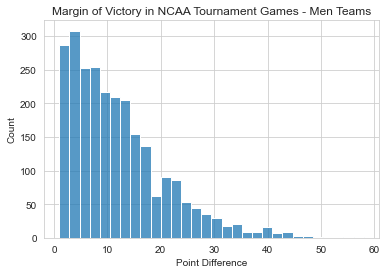

Women Team


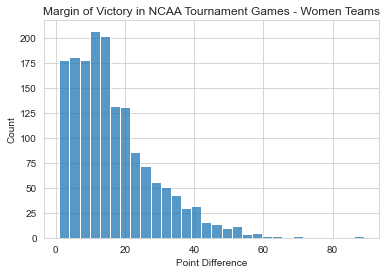

In [11]:
# Point margin in tournament games
def point_diff_plot(df, gender):
    sns.histplot(df['Point Difference'], bins=30)
    plt.title(f"Margin of Victory in NCAA Tournament Games - {gender} Teams")
    plt.xlabel("Point Difference")
    plt.show()


for gender in ['Men', 'Women']:
    print(f"{gender} Team")
    if gender == "Men":
        point_diff_plot(male_tourney_result, gender)
    else: 
        point_diff_plot(female_tourney_result, gender)


## Upsets

Men Team
Unique Winning Seeds: [ 9 11  1  3 12  5  4  2  7  8  6 13 10 14 15 16]
Unique Losing Seeds: [ 8  6 16 14  5 12 13 15 10  9 11  4  3  7  2  1]
True Upsets: 366, Non-Upset Games: 2152, Upset Percentage: 14.54%


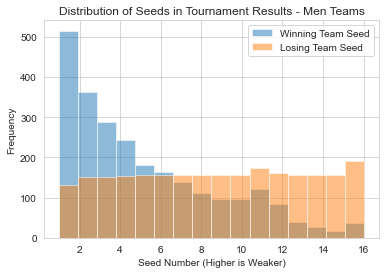

Women Team
Unique Winning Seeds: [ 2  3  7 10  4  5  9  1  6 12 16 11  8 13]
Unique Losing Seeds: [15 14 10  7 13 12  8 16 11  5  1  6  9  4  3  2]
True Upsets: 126, Non-Upset Games: 1524, Upset Percentage: 7.64%


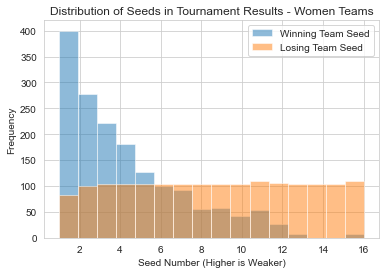

In [12]:

def tourney_result_plot(tourney_results, gender):    
    # Step 1: Check for missing seeds
    missing_seeds = tourney_results[tourney_results["WSeed"].isna() | tourney_results["LSeed"].isna()]
    if not missing_seeds.empty:
        print("Warning: Some games are missing seeds. Check the dataset.")
        display(missing_seeds)


    # Step 3: Check if WSeed and LSeed are correct
    print("Unique Winning Seeds:", tourney_results["WSeed"].unique())
    print("Unique Losing Seeds:", tourney_results["LSeed"].unique())

    # Step 4: Count correct and incorrect upsets
    true_upsets = tourney_results[tourney_results["Upset"]].shape[0]
    false_upsets = tourney_results[~tourney_results["Upset"]].shape[0]
    upsets_percentage = true_upsets / (true_upsets + false_upsets) * 100

    print(f"True Upsets: {true_upsets}, Non-Upset Games: {false_upsets}, Upset Percentage: {upsets_percentage:.2f}%")

    # Step 5: Display Upset Distribution

    plt.hist(tourney_results["WSeed"], bins=16, alpha=0.5, label="Winning Team Seed")
    plt.hist(tourney_results["LSeed"], bins=16, alpha=0.5, label="Losing Team Seed")
    plt.xlabel("Seed Number (Higher is Weaker)")
    plt.ylabel("Frequency")
    plt.title(f"Distribution of Seeds in Tournament Results - {gender} Teams")
    plt.legend()
    plt.show()


for gender in ['Men', 'Women']:
    print(f"{gender} Team")
    if gender == "Men":
        tourney_result_plot(male_tourney_result, gender)
    else:
        tourney_result_plot(female_tourney_result, gender)


🚨 **Upsets Analysis**

- We define an **upset** when a lower seed defeats a higher seed.
- Surprisingly, many upsets still show significant point differentials — they're not all narrow wins.
- We also see that the **further a team goes in the tournament**, the **less likely an upset occurs**, reinforcing the idea that top teams stabilize in later rounds.

👉 Upsets can indicate underdog performance, coach effect, or flawed seeding.


In [13]:

@interact(
    gender=Dropdown(options=['Men', 'Women'], value='Men', description='Division:'),
    year_range=IntRangeSlider(
        value=[2020, 2024],
        min=1985,
        max=2024,
        step=1,
        description='Year Range:',
        continuous_update=False
    )
)
def plot_upsets_filtered(gender, year_range):
    start_year, end_year = year_range

    # Choose the dataset
    df = male_tourney_result if gender == 'Men' else female_tourney_result
    teams_df = men_teams if gender == 'Men' else women_teams

    filtered = df[
        (df['Upset']) &
        (df['Season'].between(start_year, end_year))
    ]

    top = filtered['WTeamID'].value_counts().head(10)
    top.index = top.index.map(teams_df.set_index('TeamID')['TeamName'])

    plt.figure(figsize=(10, 6))
    sns.barplot(x=top.values, y=top.index, palette='mako')
    plt.title(f"Top Upset Teams ({gender}) from {start_year} to {end_year}")
    plt.xlabel("Number of Upsets")
    ax = plt.gca()
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))  # Force ints on x-axi
    plt.show()



interactive(children=(Dropdown(description='Division:', options=('Men', 'Women'), value='Men'), IntRangeSlider…

In [14]:
######Are upsets close games or blowouts?????????? 
@interact(
    gender=Dropdown(options=['Men', 'Women'], value='Men', description='Division:'),
    year_range=IntRangeSlider(
        value=[2010, 2024],
        min=1985,
        max=2024,
        step=1,
        description='Year Range:',
        continuous_update=False
    )
)
def plot_point_diff_distribution(gender, year_range):
    start_year, end_year = year_range

    # Choose dataset
    df = male_tourney_result if gender == 'Men' else female_tourney_result

    # Filter by year range
    filtered = df[df['Season'].between(start_year, end_year)]

    # Plot
    plt.figure(figsize=(10, 6))
    sns.histplot(
        data=filtered,
        x='Point Difference',
        hue='Upset',
        kde=True,
        palette={True: 'red', False: 'green'},
        multiple='stack'  # optional: stack the bars
    )

    plt.title(f"Point Difference Distribution: Upsets vs Non-Upsets ({gender}) {start_year}–{end_year}")
    plt.xlabel("Point Difference")
    plt.ylabel("Count")

    # Add manual legend
    handles = [
        plt.Line2D([0], [0], color='red', lw=3, label='Upset'),
        plt.Line2D([0], [0], color='green', lw=3, label='Non-Upset')
    ]
    plt.legend(handles=handles, title='Upset')

    plt.tight_layout()
    plt.show()


interactive(children=(Dropdown(description='Division:', options=('Men', 'Women'), value='Men'), IntRangeSlider…

## Conferences

In [18]:
# Merge with seed data
men_conf_seed = male_tourney_result.merge(men_team_conferences, left_on=['Season', 'WTeamID'], right_on=['Season', 'TeamID'], how='left')
#conf_seed = conf_seed.merge(conferences, on='ConfAbbrev', how='left')

wmen_conf_seed = female_tourney_result.merge(wmen_team_conferences, left_on=['Season', 'WTeamID'], right_on=['Season', 'TeamID'], how='left')


@interact(
    gender=Dropdown(options=['Men', 'Women'], value='Men', description='Division:'),
    year_range=IntRangeSlider(
        value=[2010, 2024],
        min=1985,
        max=2024,
        step=1,
        description='Year Range:',
        continuous_update=False
    )
)
def plot_conf_wseed(gender, year_range):
    start_year, end_year = year_range

    # Choose dataset
    df = men_conf_seed if gender == 'Men' else wmen_conf_seed

    # Filter by year range
    filtered = df[df['Season'].between(start_year, end_year)]

    # Boxplot: Conference vs Seed
    plt.figure(figsize=(14, 6))
    sns.boxplot(data=filtered, x='ConfAbbrev', y='WSeed')
    plt.title(f"Winning Seed Distribution by Conference ({gender}) {start_year}–{end_year}")
    plt.xlabel("Conference")
    plt.ylabel("Winning Seed")
    plt.xticks(rotation=45)
    plt.show()



interactive(children=(Dropdown(description='Division:', options=('Men', 'Women'), value='Men'), IntRangeSlider…

💥 Conferences may be a strong feature that reflects the strength behind a team’s seed — whether their top dogs dominate or get cooked by another conference’s underdogs.

-> Stronger conferences can be determined by stronger elo performance 

## Round Analyis (DayNum)

In [53]:
male_tourney_result.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WSeed,LSeed,Seed Difference,Point Difference,Upset
0,1985,136,1116,63,1234,54,N,0,9,8,1,9,False
1,1985,136,1120,59,1345,58,N,0,11,6,5,1,True
2,1985,136,1207,68,1250,43,N,0,1,16,-15,25,False
3,1985,136,1229,58,1425,55,N,0,9,8,1,3,False
4,1985,136,1242,49,1325,38,N,0,3,14,-11,11,False


In [24]:


def team_tourney_stats(tourney_results, season_seeds):
    # Group wins by Season & WTeamID
    team_tourney_stats = tourney_results.groupby(["Season", "WTeamID"]).agg(
        total_wins=("WTeamID", "count"),
        upset_wins=("Upset", "sum"),
        seed=("WSeed", "mean"),
        avg_seed_diff=("Seed Difference", "mean"),
        avg_point_margin=("Point Difference", "mean")  # Avg win margin
    ).reset_index().rename(columns={"WTeamID": "TeamID"})

    # Group losses by Season & LTeamID
    team_losses = tourney_results.groupby(["Season", "LTeamID"]).agg(
        total_losses=("LTeamID", "count"),
        avg_seed_diff_loss=("Seed Difference", "mean"),  # Seed difference in losses
        avg_point_margin_loss=("Point Difference", lambda x: -x.mean()),  # Make negative,  # Loss point margin (negative)
    ).reset_index().rename(columns={"LTeamID": "TeamID"})

    # Combine teams that participated in the tournament (from seeding data)
    all_tourney_teams = season_seeds[["Season", "TeamID", "Seeding"]].drop_duplicates()

    # Merge wins & losses (include all teams from tournament seed data)
    team_stats = all_tourney_teams.merge(team_tourney_stats, on=["Season", "TeamID"], how="left").fillna(0)
    team_stats = team_stats.merge(team_losses, on=["Season", "TeamID"], how="left").fillna(0)

    # ✅ FIX: Ensure `seed` comes from the correct source
    team_stats["seed"] = team_stats["seed"].replace(0, np.nan).fillna(team_stats["Seeding"])
    team_stats.drop(columns=["Seeding"], inplace=True)  # Remove duplicate seed column

    # ✅ FIX: Ensure `seed_diff` includes values from losses
    team_stats["avg_seed_diff"] = team_stats["avg_seed_diff"].replace(0, np.nan).fillna(team_stats["avg_seed_diff_loss"])

    # ✅ FIX: Assign point margin from losses if no wins
    team_stats["avg_point_margin"] = team_stats["avg_point_margin"].replace(0, np.nan).fillna(team_stats["avg_point_margin_loss"])

    # Drop extra loss-based seed difference columns
    team_stats.drop(columns=["avg_seed_diff_loss", "avg_point_margin_loss"], inplace=True)

    # Calculate upset percentage
    team_stats["upset_win_%"] = (team_stats["upset_wins"] / (team_stats["total_wins"] + team_stats["total_losses"])).fillna(0) * 100

    # Overperformance Index
    team_stats["expected_wins"] = 1 / team_stats["seed"].replace(0, np.nan)
    team_stats["overperformance_index"] = team_stats["total_wins"] / team_stats["expected_wins"]

    return team_stats

# Apply function to male & female tournament data
mteam_tourney_stat = team_tourney_stats(male_tourney_result, male_season_seed)
wteam_tourney_stat = team_tourney_stats(female_tourney_result, female_season_seed)


In [83]:
# Thresholds for each round
male_thresholds = {
    "play_in": 134,  # Play-in games are not included in the main rounds
    "round_of_64": 136, "round_of_32": 138, "sweet_16": 143, "elite_8": 145,
    "final_4": 152, "championship": 154
}

female_thresholds = {
    "play_in": 132,  # Play-in games are not included in the main rounds
    "round_of_64": 135, "round_of_32": 139, "sweet_16": 142, "elite_8": 146,
    "final_4": 151, "championship": 155
}

def compute_deep_run_stats(tourney_results, thresholds):
    # Final game = DayNum == championship
    champ_game = tourney_results[tourney_results['DayNum'] == thresholds['championship']].copy()

    # Winners
    winners = champ_game[['Season', 'WTeamID']].copy()
    winners['TeamID'] = winners['WTeamID']
    winners['championship_game'] = 1
    winners['champion'] = 1

    # Losers
    losers = champ_game[['Season', 'LTeamID']].copy()
    losers['TeamID'] = losers['LTeamID']
    losers['championship_game'] = 1
    losers['champion'] = 0

    # Combine both
    champ_stats = pd.concat([winners, losers], ignore_index=True)[['Season', 'TeamID', 'championship_game', 'champion']]

    # Now join this with the original round stats (from WTeamID only)
    run_stats = tourney_results.groupby(["Season", "WTeamID"]).agg(
        round_of_32=("DayNum", lambda x: int((x >= thresholds["round_of_32"]).any())),
        sweet_16=("DayNum", lambda x: int((x >= thresholds["sweet_16"]).any())),
        elite_8=("DayNum", lambda x: int((x >= thresholds["elite_8"]).any())),
        final_4=("DayNum", lambda x: int((x >= thresholds["final_4"]).any()))
    ).reset_index().rename(columns={"WTeamID": "TeamID"})

    # Merge in championship data (now contains both winners & losers)
    run_stats = pd.merge(run_stats, champ_stats, on=["Season", "TeamID"], how="outer").fillna(0)
    run_stats["championship_game"] = run_stats["championship_game"].astype(int)
    run_stats["champion"] = run_stats["champion"].astype(int)

    return run_stats



# Compute deep run stats for male and female tournaments
mteam_deep_run_stats = compute_deep_run_stats(male_tourney_result, male_thresholds)
wteam_deep_run_stats = compute_deep_run_stats(female_tourney_result, female_thresholds)

# Function to determine the deepest round a team reached
def get_deepest_round(day, thresholds):
    """Returns the deepest round based on the highest DayNum reached."""
    if day >= thresholds["championship"]:
        return 6  # Championship Game
    elif day >= thresholds["final_4"]:
        return 5  # Final 4
    elif day >= thresholds["elite_8"]:
        return 4  # Elite 8
    elif day >= thresholds["sweet_16"]:
        return 3  # Sweet 16
    elif day >= thresholds["round_of_32"]:
        return 2  # Round of 32
    else:
        return 1  # Round of 64

# Compute deepest round based on all games played, not just wins
def compute_deepest_rounds(tourney_results, thresholds):
    all_games = tourney_results.melt(id_vars=["Season", "DayNum"], 
                                     value_vars=["WTeamID", "LTeamID"], 
                                     var_name="Win_Loss", value_name="TeamID")
    
    # Find max DayNum for each team per season
    deepest_rounds = all_games.groupby(["Season", "TeamID"])["DayNum"].max().reset_index()
    
    # ✅ Apply function to scalar values instead of lists
    deepest_rounds["deepest_round"] = deepest_rounds["DayNum"].apply(lambda x: get_deepest_round(x, thresholds))
    
    return deepest_rounds.drop(columns=["DayNum"])  # Drop DayNum, keep deepest_round

# Apply deepest round computation
m_deepest_rounds = compute_deepest_rounds(male_tourney_result, male_thresholds)
w_deepest_rounds = compute_deepest_rounds(female_tourney_result, female_thresholds)

# Merge deepest round data into deep run stats
mteam_deep_run_stats = mteam_deep_run_stats.merge(m_deepest_rounds, on=["Season", "TeamID"], how="left").fillna(1)
wteam_deep_run_stats = wteam_deep_run_stats.merge(w_deepest_rounds, on=["Season", "TeamID"], how="left").fillna(1)

In [ ]:
mteam_seed_stat = mteam_tourney_stat.merge(mteam_deep_run_stats, on=["Season", "TeamID"], how="left").fillna(0)
wteam_seed_stat = wteam_tourney_stat.merge(wteam_deep_run_stats, on=["Season", "TeamID"], how="left").fillna(0)
#mteam_seed_stat.head()

,Season,TeamID,total_wins,upset_wins,seed,avg_seed_diff,avg_point_margin,total_losses,upset_win_%,expected_wins,overperformance_index,round_of_32,sweet_16,elite_8,final_4,championship_game,champion,deepest_round
34,1985,1181,1.0,0.0,3.0,-11.000000,13.000000,1.0,0.0,0.333333,3.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
64,1986,1181,5.0,0.0,1.0,-7.800000,13.400000,1.0,0.0,1.000000,5.0,1.0,1.0,1.0,1.0,1.0,0.0,6.0
164,1987,1181,2.0,0.0,5.0,-7.500000,6.000000,1.0,0.0,0.200000,10.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0
193,1988,1181,4.0,0.0,2.0,-6.500000,10.500000,1.0,0.0,0.500000,8.0,1.0,1.0,1.0,0.0,0.0,0.0,5.0
257,1989,1181,4.0,0.0,2.0,-6.500000,13.250000,1.0,0.0,0.500000,8.0,1.0,1.0,1.0,0.0,0.0,0.0,5.0
322,1990,1181,5.0,0.0,3.0,-3.400000,12.600000,1.0,0.0,0.333333,15.0,1.0,1.0,1.0,1.0,1.0,0.0,6.0
417,1991,1181,6.0,0.0,2.0,-4.833333,14.000000,0.0,0.0,0.500000,12.0,1.0,1.0,1.0,1.0,1.0,1.0,6.0
448,1992,1181,6.0,0.0,1.0,-5.500000,12.500000,0.0,0.0,1.000000,6.0,1.0,1.0,1.0,1.0,1.0,1.0,6.0
530,1993,1181,1.0,0.0,3.0,-11.000000,35.000000,1.0,0.0,0.333333,3.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
593,1994,1181,5.0,0.0,2.0,-4.400000,9.400000,1.0,0.0,0.500000,10.0,1.0,1.0,1.0,1.0,1.0,0.0,6.0


In [92]:

@interact(
    gender=Dropdown(options=['Men', 'Women'], value='Men', description='Gender:'),
    year_range=IntRangeSlider(
        value=[2000, 2024],
        min=1985,
        max=2024,
        step=1,
        description='Years:'
    ),
    round_col=Dropdown(
        options=[
            ('The Champions', 'champion'),
            ('Championship Game', 'championship_game'),
            ('Final 4', 'final_4'),
            ('Elite 8', 'elite_8'),
            ('Sweet 16', 'sweet_16')
        ],
        value='championship_game',
        description='Round:'
    )
)
def plot_top_teams_by_round(gender, year_range, round_col):
    # Select dataset
    df =mteam_seed_stat if gender == 'Men' else wteam_seed_stat
    teams_df = men_teams if gender == 'Men' else women_teams

    # Filter by year
    df_filtered = df[df['Season'].between(year_range[0], year_range[1])]

    # Group by team and count round appearances
    team_counts = df_filtered.groupby('TeamID')[round_col].sum()

    # Top 10 teams only
    top_teams = team_counts.sort_values(ascending=False).head(10)

    # Map team names
    top_teams.index = top_teams.index.map(teams_df.set_index('TeamID')['TeamName'])

    # Plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_teams.values, y=top_teams.index, palette='crest')
    plt.title(f"Top 10 {gender} Teams by '{round_col.replace('_', ' ').title()}' Appearances ({year_range[0]}–{year_range[1]})")
    plt.xlabel("Appearances")
    plt.tight_layout()
    plt.show()


interactive(children=(Dropdown(description='Gender:', options=('Men', 'Women'), value='Men'), IntRangeSlider(v…

## COACH

men's team only, women's files not available

In [100]:
def process_regular_season(mreg_compact, men_coaches):
    """
    Process regular season data (mreg_compact) to calculate:
    - Cumulative total wins per coach (computed from WTeamID)
    - Cumulative total games played per coach (Wins + Losses from mreg_compact)
    - Cumulative clutch games played (games with margin <= 5, for both wins & losses)
    - Keeps TeamID in the final output
    - Avoids modifying the original datasets
    """

    # ✅ Create copies to ensure original data is not modified
    men_coaches_copy = men_coaches.copy()
    mreg_copy = mreg_compact.copy()

    # ✅ Merge coaches with winning teams
    reg_season = mreg_copy.merge(
        men_coaches_copy[['Season', 'TeamID', 'CoachName']], 
        left_on=['Season', 'WTeamID'], right_on=['Season', 'TeamID'], how='left'
    )

    # ✅ Merge coaches with losing teams
    reg_season = reg_season.merge(
        men_coaches_copy[['Season', 'TeamID', 'CoachName']], 
        left_on=['Season', 'LTeamID'], right_on=['Season', 'TeamID'], 
        how='left', suffixes=('', '_L')
    )

    # ✅ Compute Total Wins per Coach
    total_wins = reg_season.groupby(['Season', 'CoachName', 'WTeamID']).size().reset_index(name='Coach_Total_Regular_Wins')

    # ✅ Compute Total Losses per Coach
    total_losses = reg_season.groupby(['Season', 'CoachName_L', 'LTeamID']).size().reset_index(name='Coach_Total_Regular_Losses')
    total_losses.rename(columns={'CoachName_L': 'CoachName'}, inplace=True)  

    # ✅ Compute Total Games Played (Wins + Losses)
    total_games = total_wins.merge(total_losses, 
                                   left_on=['Season', 'CoachName', 'WTeamID'],
                                   right_on=['Season', 'CoachName', 'LTeamID'], 
                                   how='outer').fillna(0)

    total_games['Coach_Total_Regular_Games'] = total_games['Coach_Total_Regular_Wins'] + total_games['Coach_Total_Regular_Losses']

    # ✅ Clutch Games (Both Wins & Losses)
    clutch_games = mreg_copy[(mreg_copy['WScore'] - mreg_copy['LScore']) <= 5]

    # ✅ Compute Clutch Wins per Coach
    clutch_wins = clutch_games.merge(men_coaches_copy[['Season', 'TeamID', 'CoachName']], 
                                     left_on=['Season', 'WTeamID'], right_on=['Season', 'TeamID'], how='left')
    clutch_wins = clutch_wins.groupby(['Season', 'CoachName', 'WTeamID']).size().reset_index(name='Coach_Clutch_Wins')

    # ✅ Compute Clutch Losses per Coach
    clutch_losses = clutch_games.merge(men_coaches_copy[['Season', 'TeamID', 'CoachName']], 
                                       left_on=['Season', 'LTeamID'], right_on=['Season', 'TeamID'], how='left')
    clutch_losses = clutch_losses.groupby(['Season', 'CoachName', 'LTeamID']).size().reset_index(name='Coach_Clutch_Losses')

    # ✅ Merge Clutch Wins & Losses
    clutch_stats = clutch_wins.merge(clutch_losses, on=['Season', 'CoachName'], how='outer').fillna(0)

    # ✅ Fix: Assign TeamID from Total Wins/Losses (Avoids 0)
    clutch_stats['TeamID'] = clutch_stats['WTeamID'].combine_first(clutch_stats['LTeamID']).astype(int)
    clutch_stats.drop(columns=['WTeamID', 'LTeamID'], inplace=True, errors='ignore')

    # ✅ Fix: Compute `Coach_Total_Clutch_Games`
    clutch_stats['Coach_Total_Clutch_Games'] = clutch_stats['Coach_Clutch_Wins'] + clutch_stats['Coach_Clutch_Losses']

    # ✅ Merge Clutch Stats with Total Wins/Losses
    coach_stats = total_games.merge(clutch_stats, on=['Season', 'CoachName'], how='left').fillna(0)

    # ✅ Ensure numeric types
    numeric_cols = ['Coach_Total_Regular_Wins', 'Coach_Total_Regular_Losses', 'Coach_Total_Regular_Games',
                    'Coach_Clutch_Wins', 'Coach_Clutch_Losses', 'Coach_Total_Clutch_Games']
    coach_stats[numeric_cols] = coach_stats[numeric_cols].astype(int)

    # ✅ Compute Cumulative Sums
    coach_stats = coach_stats.sort_values(by=['CoachName', 'Season'], ascending=True)
    coach_stats['Cumulative_Coach_Total_Wins'] = coach_stats.groupby('CoachName')['Coach_Total_Regular_Wins'].cumsum()
    coach_stats['Cumulative_Coach_Total_Games'] = coach_stats.groupby('CoachName')['Coach_Total_Regular_Games'].cumsum()
    coach_stats['Cumulative_Coach_Clutch_Wins'] = coach_stats.groupby('CoachName')['Coach_Clutch_Wins'].cumsum()
    coach_stats['Cumulative_Coach_Clutch_Losses'] = coach_stats.groupby('CoachName')['Coach_Clutch_Losses'].cumsum()
    coach_stats['Cumulative_Coach_Total_Clutch_Games'] = coach_stats.groupby('CoachName')['Coach_Total_Clutch_Games'].cumsum()

    # ✅ Ensure `TeamID` is retained and drop extra columns
    coach_stats = coach_stats[['Season', 'TeamID', 'CoachName', 
                               'Cumulative_Coach_Total_Wins', 'Cumulative_Coach_Total_Games', 
                               'Cumulative_Coach_Clutch_Wins', 'Cumulative_Coach_Clutch_Losses', 
                               'Cumulative_Coach_Total_Clutch_Games']]

    # ✅ Drop rows where `TeamID` is missing or 0
    coach_stats = coach_stats[coach_stats['TeamID'] != 0]

    return coach_stats

# ✅ Run the Function
b_reg = process_regular_season(mreg_compact, men_coaches)

# ✅ Check if `TeamID = 0` Exists
# Should return an empty DataFrame


In [101]:
def process_postseason(mncaa_compact, men_coaches):
    """
    Process postseason data (mncaa_compact) to calculate:
    - Cumulative total postseason wins per coach
    - Total postseason games played (Round Exit)
    - Cumulative postseason clutch wins (games won by ≤5 points)
    - Avoids modifying the original datasets
    """

    # ✅ Step 1: Prepare Coaches Data
    men_coaches = men_coaches.sort_values(by=['CoachName', 'TeamID', 'Season'])

    # 🔹 Compute cumulative experience per coach (number of seasons coached)
    men_coaches['exp_team'] = men_coaches.groupby(['CoachName', 'TeamID']).cumcount() + 1
    men_coaches['exp_ncaa'] = men_coaches.groupby(['CoachName']).cumcount() + 1

    # 🔹 Identify Coach Changes (1 if new coach in that season)
    men_coaches['CoachChange'] = (men_coaches['FirstDayNum'] != 0).astype(int)

    # 🔹 Keep only coaches who finished the season (LastDayNum == 154)
    men_coaches = men_coaches[men_coaches['LastDayNum'] == 154].drop(columns=['LastDayNum', 'FirstDayNum'])

    # ✅ Step 2: Merge Coaches with Postseason Data
    postseason = mncaa_compact.merge(men_coaches, left_on=['Season', 'WTeamID'], right_on=['Season', 'TeamID'], how='left')
    postseason = postseason.merge(men_coaches, left_on=['Season', 'LTeamID'], right_on=['Season', 'TeamID'], how='left', suffixes=('', '_L'))

    # ✅ Step 3: Compute Wins Normally (Reverting to Your Original Logic)
    total_wins = postseason.groupby(['Season', 'WTeamID', 'CoachName']).size().reset_index(name='Total_OffSeason_Wins')

    # ✅ Step 4: Assign `Total_OffSeason_Lost = 1` for All Losing Teams
    lost = postseason[['Season', 'LTeamID', 'CoachName_L']].drop_duplicates()
    lost = lost.rename(columns={'LTeamID': 'TeamID', 'CoachName_L': 'CoachName'})
    lost['Total_OffSeason_Lost'] = 1  # Every losing team gets exactly 1 loss

    # ✅ Step 5: Merge Wins & Losses on TeamID (Your Original Merge Logic)
    total_win_lost = total_wins.rename(columns={'WTeamID': 'TeamID'}).merge(
        lost, on=['Season', 'TeamID', 'CoachName'], how='outer'
    )

    # 🔹 Fill NaN for Teams That Never Lost or Never Won
    total_win_lost['Total_OffSeason_Wins'] = total_win_lost['Total_OffSeason_Wins'].fillna(0)
    total_win_lost['Total_OffSeason_Lost'] = total_win_lost['Total_OffSeason_Lost'].fillna(0)

    # 🔹 Compute Round Exit
    total_win_lost['OffSeason_Round_Exit'] = total_win_lost['Total_OffSeason_Wins'] + total_win_lost['Total_OffSeason_Lost']

    # ✅ Step 6: Compute Postseason Clutch Wins (Wins by ≤5 Points)
    clutch_wins = postseason[(postseason['WScore'] - postseason['LScore']) <= 5]
    clutch_wins = clutch_wins.groupby(['Season', 'WTeamID', 'CoachName']).size().reset_index(name='Total_OffSeason_Clutch_Wins')

    # 🔹 Merge Clutch Wins on WTeamID BEFORE dropping it
    total_win_lost = total_win_lost.merge(clutch_wins.rename(columns={'WTeamID': 'TeamID'}), 
                                          on=['Season', 'TeamID', 'CoachName'], how='left').fillna(0)

    # ✅ Step 7: Merge with Coaches Data
    b = men_coaches.merge(total_win_lost, on=['Season', 'TeamID', 'CoachName'], how='left')

    # 🔹 Fill missing values
    b[['Total_OffSeason_Wins', 'Total_OffSeason_Lost', 'OffSeason_Round_Exit', 'Total_OffSeason_Clutch_Wins']] = b[
        ['Total_OffSeason_Wins', 'Total_OffSeason_Lost', 'OffSeason_Round_Exit', 'Total_OffSeason_Clutch_Wins']
    ].fillna(0)

    # ✅ Step 8: Compute Cumulative Stats (Your Original Cumsum Logic)
    b = b.sort_values(by=['CoachName', 'Season'])
    b['OffSeason_Cumulative_Coach_Wins'] = b.groupby('CoachName')['Total_OffSeason_Wins'].cumsum().shift(1).fillna(0)
    b['OffSeason_Cumulative_Coach_Clutch_Wins'] = b.groupby('CoachName')['Total_OffSeason_Clutch_Wins'].cumsum().shift(1).fillna(0)

    return b

# ✅ Run the function again
b = process_postseason(mncaa_compact, men_coaches)



In [102]:
coaches_stat = b_reg.merge(b, on=['Season', 'TeamID', 'CoachName'], how='outer')
coaches_stat = coaches_stat.fillna(0)
coaches_stat['TeamID'] = coaches_stat['TeamID'].astype(int)

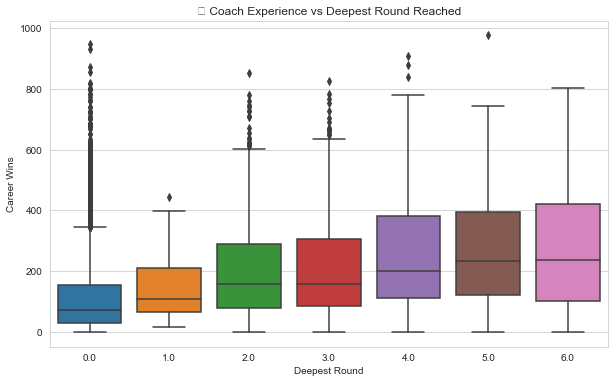

In [145]:
df= coaches_stat.merge(mteam_seed_stat, on=['Season', 'TeamID'], how='left')
df = df.fillna(0)
df.columns

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='deepest_round', y='Cumulative_Coach_Total_Wins')
plt.title("📈 Coach Experience vs Deepest Round Reached")
plt.xlabel("Deepest Round")
plt.ylabel("Career Wins")
plt.show()


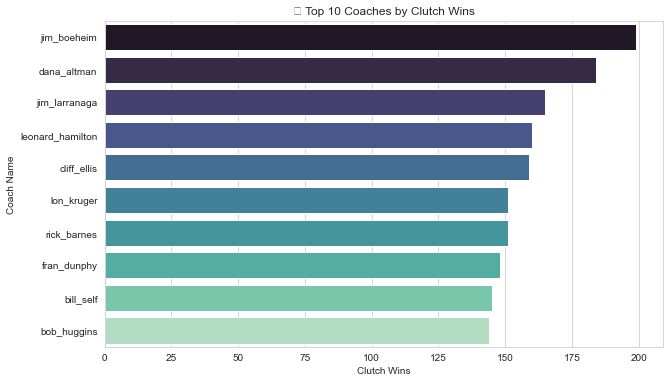

In [150]:
top_clutch = df.groupby("CoachName")['Cumulative_Coach_Clutch_Wins'].max().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_clutch.values, y=top_clutch.index, palette='mako')
plt.title("🏀 Top 10 Coaches by Clutch Wins")
plt.xlabel("Clutch Wins")
plt.ylabel("Coach Name")
plt.show()


## RANKING

Men's team only

In [139]:

last_day_ranking = rankings.groupby(['Season','SystemName','TeamID'])['RankingDayNum'].max().reset_index() ## Extract the lastest ranking of the season of the team
last_day_ranking = pd.merge(last_day_ranking,rankings,how = 'left',on = ['Season','SystemName','TeamID','RankingDayNum'])
last_day_ranking.drop('RankingDayNum',axis = 1, inplace = True)
lastest_ranking = last_day_ranking.pivot(index = ["Season","TeamID"],columns = "SystemName",values = "OrdinalRank").reset_index()
male_ranking = lastest_ranking.apply(lambda row: row.fillna(np.ceil(row.mean()) ),axis=1 ) # Replace all Na value with mean of ranking across all system
male_ranking.isna().sum()
male_ranking.columns = ['_'.join(col) if isinstance(col, tuple) else col for col in male_ranking.columns]
male_ranking_old = male_ranking[male_ranking['Season'] < 2021].groupby('TeamID').agg('mean').reset_index()
male_ranking_old.drop('Season',axis = 1,inplace = True)
male_ranking_old = male_ranking_old.set_index('TeamID').mean(axis=1).reset_index()
male_ranking_new = male_ranking.merge(male_ranking_old,how = 'left',on = 'TeamID')

In [144]:
male_ranking_new.head()

,Season,TeamID,7OT,ACU,ADE,AP,ARG,ATP,AUS,AWS,...,WLK,WLS,WMR,WMV,WOB,WOL,WTE,YAG,ZAM,0
0,2003.0,1102.0,232.0,232.0,232.0,232.0,141.0,232.0,232.0,232.0,...,165.0,232.0,232.0,232.0,155.0,157.0,156.0,232.0,232.0,204.286458
1,2003.0,1103.0,246.0,246.0,246.0,246.0,180.0,246.0,246.0,246.0,...,172.0,246.0,246.0,246.0,177.0,171.0,161.0,246.0,246.0,148.042245
2,2003.0,1104.0,117.0,117.0,117.0,22.0,37.0,117.0,117.0,117.0,...,36.0,117.0,117.0,117.0,37.0,37.0,28.0,117.0,117.0,104.357350
3,2003.0,1105.0,378.0,378.0,378.0,378.0,307.0,378.0,378.0,378.0,...,310.0,378.0,378.0,378.0,312.0,311.0,299.0,378.0,378.0,353.395833
4,2003.0,1106.0,333.0,333.0,333.0,333.0,252.0,333.0,333.0,333.0,...,254.0,333.0,333.0,333.0,265.0,270.0,256.0,333.0,333.0,324.445602
